In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [28]:
df = pd.read_csv('insurance.csv')
df.sample(7)

,age,sex,bmi,children,smoker,region,charges
35,19,male,20.425,0,no,northwest,1625.43375
785,35,female,27.700,3,no,southwest,6414.17800
1312,34,male,42.900,1,no,southwest,4536.25900
597,34,female,33.250,1,no,northeast,5594.84550
271,50,male,34.200,2,yes,southwest,42856.83800
471,18,female,30.115,0,no,northeast,2203.47185
157,18,male,25.175,0,yes,northeast,15518.18025


In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
# Here order of 

In [30]:
df['smoker'] = oe.fit_transform(df[['smoker']])

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',dtype=np.int32)
X_new = ohe.fit_transform(df[['sex','region']]).toarray()

In [32]:
newMat = pd.DataFrame(X_new,columns=ohe.get_feature_names_out(['sex', 'region']))
df = pd.concat([newMat, df], axis=1)

In [33]:
df.drop(columns=['sex','region'], inplace= True)

In [34]:
#df.sort_index(axis=1, inplace = True)
df.sample(7)

,sex_male,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker,charges
499,0,0,0,1,62,39.20,0,0.0,13470.86000
1132,1,0,0,0,57,40.28,0,0.0,20709.02034
1240,1,0,1,0,52,41.80,2,1.0,47269.85400
757,0,0,1,0,47,27.83,0,1.0,23065.42070
1239,0,0,1,0,25,42.13,1,0.0,3238.43570
1046,0,0,0,0,43,25.08,0,0.0,7325.04820
413,1,0,0,1,25,23.90,5,0.0,5080.09600


In [35]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42, shuffle = True)

In [37]:
from sklearn.tree import DecisionTreeRegressor
treeModel = DecisionTreeRegressor(max_depth=4)
treeModel.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [38]:
## Here the decision tree is giving best performance for max_depth = 4
# These setting of max_depth = 4 and finding the max_depth is called hyperparameter tuning

In [39]:
from sklearn.linear_model import LinearRegression
linRG = LinearRegression()
linRG.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred_LG = linRG.predict(x_test)

In [41]:
y_pred_tree = treeModel.predict(x_test)

In [42]:
comp = pd.DataFrame({"Actual": y_test, "LinearRegression":y_pred_LG, "DecisionTree":y_pred_tree})

In [43]:
comp.head()

,Actual,LinearRegression,DecisionTree
764,9095.06825,8969.550274,10662.682863
887,5272.17580,7068.747443,5703.338752
890,29330.98315,36858.410912,27503.008287
1293,9301.89355,9454.678501,10662.682863
259,33750.29180,26973.173457,35031.660932


In [44]:
from sklearn.metrics import r2_score

In [45]:
print("R2 score for linear regression is: ", r2_score(y_test, y_pred_LG))

R2 score for linear regression is:  0.7835929767120722


In [46]:
print("R2 score for decision tree regression is: ", r2_score(y_test, y_pred_tree))

R2 score for decision tree regression is:  0.8641310379678357


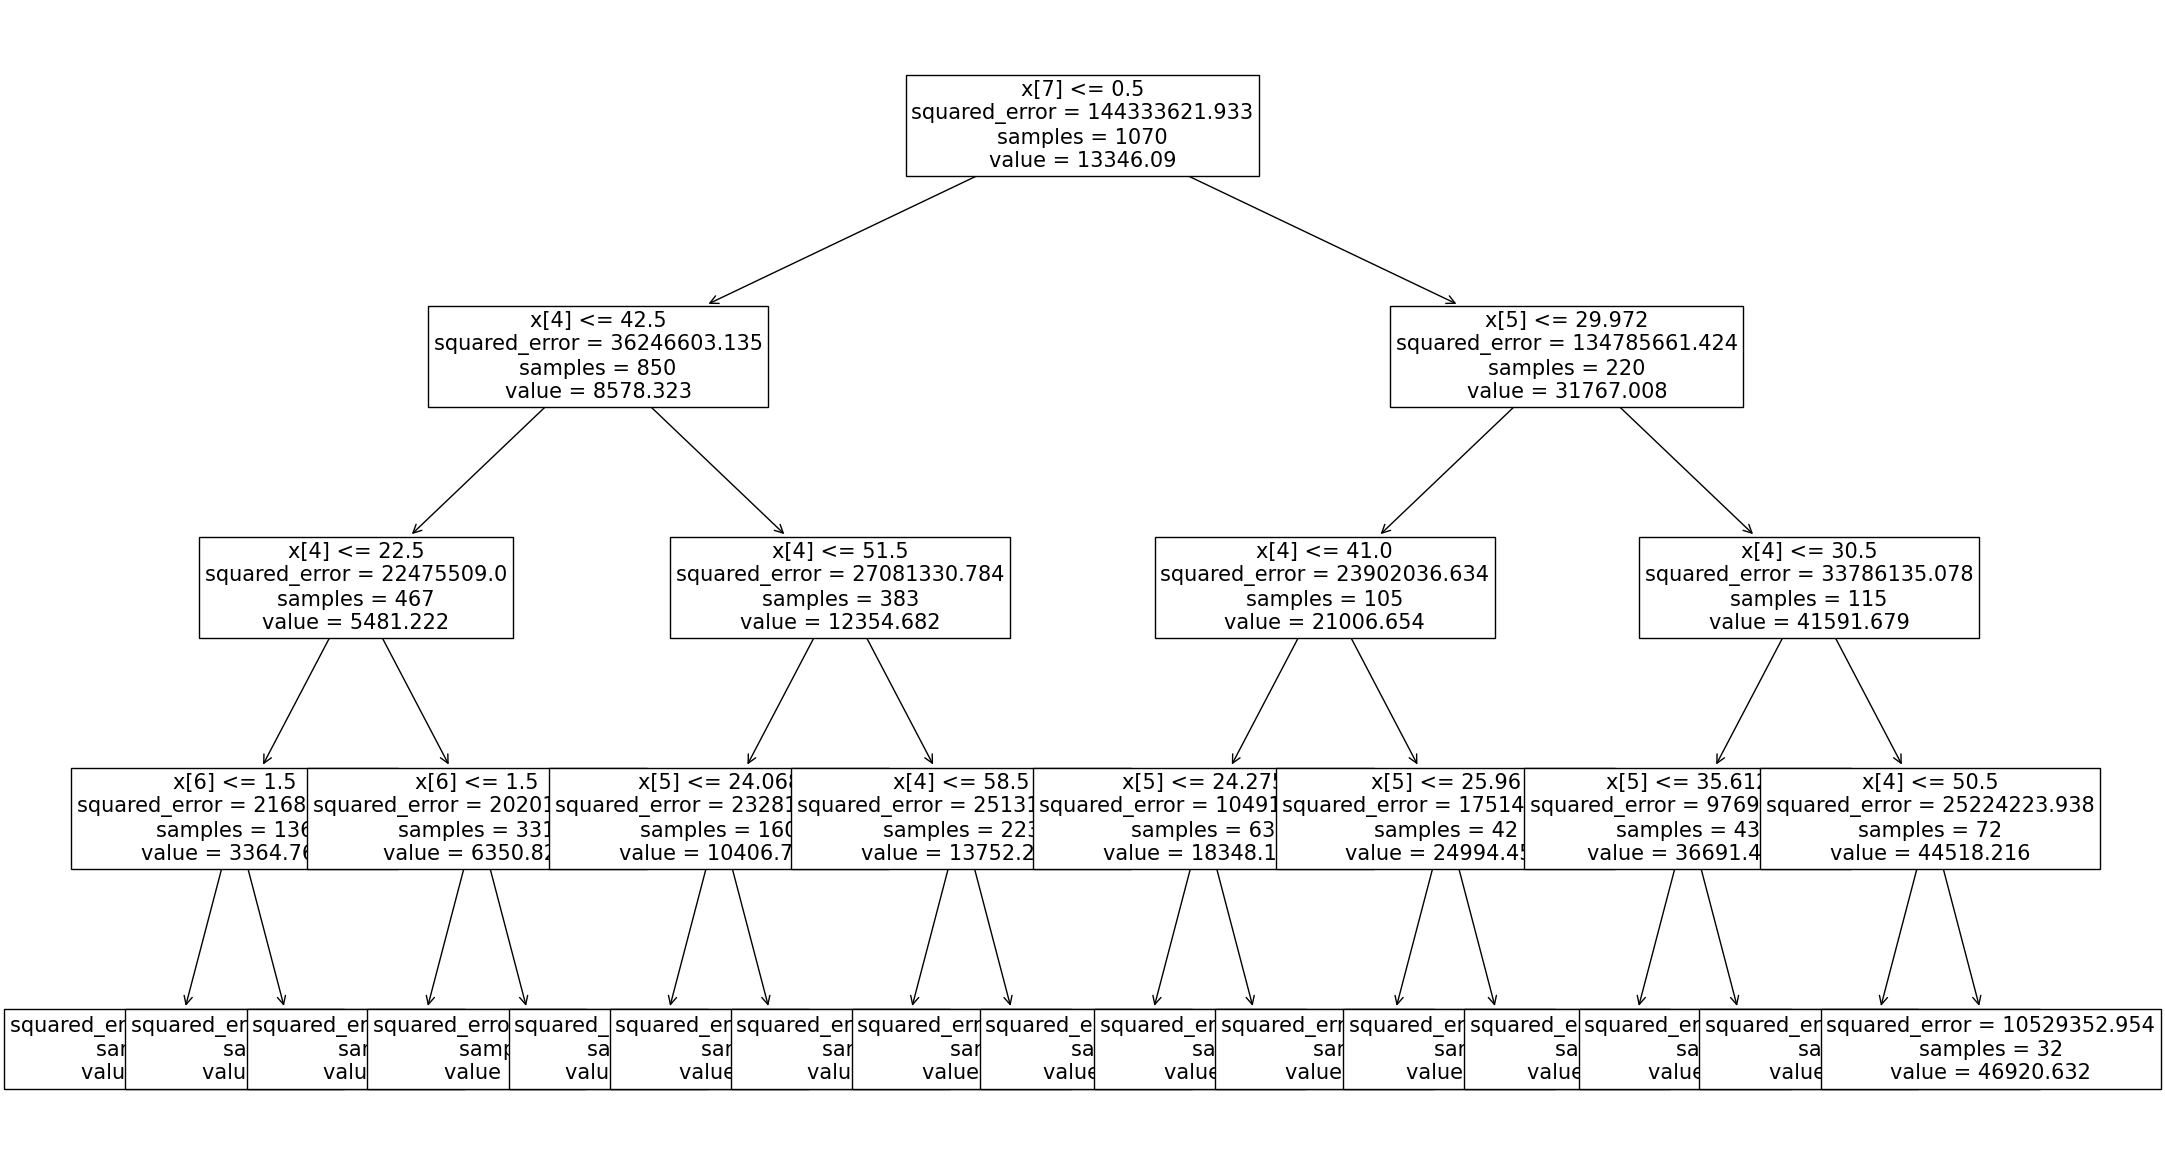

In [47]:
## Now plotting of decision tree
## Now plotting the tree
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(treeModel,fontsize=15)
plt.show()

In [48]:
""" 
Decision tree regression is a machine learning algorithm used for predicting numerical values or continuous outcomes. While decision trees are often associated with classification problems, they can also be applied to regression tasks. The process of decision tree regression involves recursively partitioning the data into subsets based on the values of input features to make predictions about the target variable.

Here's a step-by-step explanation of how decision tree regression works:

Splitting the Data:

The decision tree starts by considering the entire dataset as the root node.
It selects the feature and a corresponding threshold that best splits the data into subsets, aiming to minimize the variance of the target variable within each subset.
The splitting process is based on a criterion, often mean squared error (MSE) for regression tasks.
Building the Tree:

Once the first split is made, the process is repeated for each subset, creating child nodes.
The splitting continues until a predefined stopping criterion is met, such as a maximum depth, a minimum number of samples in a leaf node, or no further improvement in the chosen criterion.
Leaf Nodes and Predictions:

Each terminal node (leaf node) of the tree represents a subset of the data.
The predicted value for each leaf node is often the mean (or median) of the target variable within that subset.
Making Predictions:

To make a prediction for a new instance, it traverses the decision tree from the root to a leaf node based on the feature values of the instance.
The predicted value for the instance is the value associated with the leaf node reached during traversal.
Handling Categorical Features:

For categorical features, the decision tree uses binary splits. It creates branches for each category, and instances are directed down the appropriate branch based on their category.
"""

" \nDecision tree regression is a machine learning algorithm used for predicting numerical values or continuous outcomes. While decision trees are often associated with classification problems, they can also be applied to regression tasks. The process of decision tree regression involves recursively partitioning the data into subsets based on the values of input features to make predictions about the target variable.\n\nHere's a step-by-step explanation of how decision tree regression works:\n\nSplitting the Data:\n\nThe decision tree starts by considering the entire dataset as the root node.\nIt selects the feature and a corresponding threshold that best splits the data into subsets, aiming to minimize the variance of the target variable within each subset.\nThe splitting process is based on a criterion, often mean squared error (MSE) for regression tasks.\nBuilding the Tree:\n\nOnce the first split is made, the process is repeated for each subset, creating child nodes.\nThe splitting

## Now Doing Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
RFmodel = RandomForestRegressor(n_estimators = 40, random_state = 42)
# The name suggests that it takes random subset and apply multiple decision tree on it
## Taking number of subsets is a hyperparameter which is to be specified in the arguements

In [52]:
RFmodel.fit(x_train, y_train)
y_pred_RF = RFmodel.predict(x_test)

In [53]:
comp['RandomForest'] = y_pred_RF

In [54]:
print("The r2 score is: ", r2_score(y_test, y_pred_RF))

The r2 score is:  0.8631604811309529
